<a href="https://colab.research.google.com/github/Dadoyen2/RF-classification_ANN_RF_regression-_for-_BBB-permeation/blob/main/Nureni_RF_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np


In [2]:
# Load the data
file_path = "/content/BBB_features.csv"
BBB_filtered = "BBB_filtered.csv"

# Read the data into a DataFrame
df = pd.read_csv(file_path, sep=";", header=0)
print(df)
# Filter rows where the name column contains '_c0'
filtered_df = df[df[df.columns[0]].str.contains("_c0", case=False, na=False)]

# Save the filtered DataFrame
filtered_df.to_csv(BBB_filtered, index=False)
print(f"Filtered file saved to: {BBB_filtered}")

# Optional: Download the file in Google Colab
#from google.colab import files
#files.download(BBB_filtered)

                           Objects        V        S        R        G  \
0     1,1,1,2-tetrachloroethane_c0  327.875  248.402  1.31994  1.12279   
1     1,1,1,2-tetrachloroethane_c1  327.750  249.588  1.31316  1.13127   
2     1,1,1,2-tetrachloroethane_c2  327.625  241.829  1.35478  1.07934   
3     1,1,1,2-tetrachloroethane_c3  326.250  243.898  1.33765  1.09783   
4     1,1,1,2-tetrachloroethane_c4  327.625  244.183  1.34172  1.09514   
...                            ...      ...      ...      ...      ...   
3603                   zolpidem_c5  744.875  499.029  1.49265  1.40728   
3604                   zolpidem_c6  755.250  514.531  1.46784  1.45312   
3605                   zolpidem_c7  761.000  524.801  1.45007  1.48553   
3606                   zolpidem_c8  761.625  523.825  1.45397  1.48017   
3607                   zolpidem_c9  762.375  521.041  1.46318  1.46694   

             d        W1       W2       W3      W4  ...   P3        P4  \
0     0.511927   560.000  163.875    

In [3]:
file_paths = "/content/BBB_filtered.csv"
BBB_features_new = pd.read_csv(file_paths)
display(BBB_features_new)

,Objects,V,S,R,G,d,W1,W2,W3,W4,...,P3,P4,P5,EMDIF,EMDIS,Sdry/S,Spol/S,FLEX_PT,PAINS,CUSTOM
0,"1,1,1,2-tetrachloroethane_c0",327.875,248.402,1.31994,1.12279,0.511927,560.000,163.875,4.875,0.000,...,0.000000,0.000000,0.000000,3.11199,2.80238,1.000000,0.000000,0.195959,0,NaN
1,"1,1-difluorochloroethylene_c0",210.125,175.335,1.19842,1.03896,0.468668,540.875,335.875,190.000,79.750,...,0.000000,0.000000,0.000000,3.63672,1.35907,0.522885,0.432101,0.000000,0,NaN
2,"1,2-dichloroethane_c0",256.375,205.486,1.24765,1.08036,0.385992,406.875,66.625,0.000,0.000,...,0.000000,0.000000,0.000000,1.50746,2.25570,1.000000,0.000000,0.500000,0,NaN
3,"1,4-divinyloxybutane_c0",430.000,316.145,1.36013,1.22924,0.330687,658.750,302.500,126.625,45.250,...,0.200000,0.000000,0.000000,2.50582,2.93298,0.683736,0.135974,5.533990,0,NaN
4,16a-fluoroestradiol_c0,632.125,417.592,1.51374,1.26940,0.459359,1104.750,704.750,315.625,119.500,...,0.086957,0.086957,0.000000,5.96007,1.36324,0.583919,0.271856,0.000000,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,zanapezil_c0,931.375,614.992,1.51445,1.53976,0.404278,1331.750,607.375,238.500,92.375,...,0.035714,0.035714,0.035714,7.53167,5.76972,0.854906,0.142695,2.319440,0,NaN
326,zidovudine_c0,553.125,389.404,1.42044,1.30632,0.483148,1155.630,914.750,569.375,269.000,...,0.200000,0.200000,0.000000,7.86730,3.57688,0.346269,0.653731,0.848880,1,NaN
327,ZINC04226975_c0,494.125,354.873,1.39240,1.27218,0.413440,900.625,540.500,312.625,119.750,...,0.066667,0.133333,0.000000,5.95301,3.08573,0.683714,0.316286,0.915790,0,NaN
328,zolantidine_c0,911.250,626.518,1.45447,1.61822,0.418693,1421.000,706.625,330.750,80.375,...,0.074074,0.037037,0.037037,7.39785,11.46210,0.766650,0.121874,4.248470,0,NaN


In [4]:
import pandas as pd

# Step 1: Load the BBB.labels file
labels_file = "/content/BBB_labels.txt"
labels_data = []

# Read labels and targets into a list of dictionaries
with open(labels_file, "r") as file:
    for line in file:
        parts = line.strip().split()
        name = parts[0]  # Name of the chemical
        value = float(parts[-1])  # Target value
        labels_data.append({"Name": name, "Target": value})

# Convert to a DataFrame
df_labels = pd.DataFrame(labels_data)

#display(df_labels)

# Step 3: Clean the names in BBB_features to match BBB_labels
BBB_features_new['Cleaned_Name'] = BBB_features_new['Objects'].str.replace('_c0', '', regex=False)

# Step 1: Replace the 'Objects' column with 'Cleaned_Name' values
BBB_features_new['Objects'] = BBB_features_new['Cleaned_Name']

# Step 2: Drop the 'Cleaned_Name' column
BBB_features_new = BBB_features_new.drop(columns=['Cleaned_Name'])

# Display the updated DataFrame




#display(BBB_features_new)


# Step 4: Merge the data to align targets using Cleaned_Name
df_merged = BBB_features_new.merge(df_labels, left_on="Objects", right_on="Name", how="left")

display(df_merged)




# Step 2: Find rows where the Target column is NaN (unmatched names)
unmatched_names = df_merged[df_merged['Target'].isna()]['Objects']

# Step 3: Print the unmatched names
print("Names in features not found in labels:")
print(unmatched_names.to_list())

# Optional: Display the count of unmatched names
print(f"Total unmatched names: {len(unmatched_names)}")





,Objects,V,S,R,G,d,W1,W2,W3,W4,...,P5,EMDIF,EMDIS,Sdry/S,Spol/S,FLEX_PT,PAINS,CUSTOM,Name,Target
0,"1,1,1,2-tetrachloroethane",327.875,248.402,1.31994,1.12279,0.511927,560.000,163.875,4.875,0.000,...,0.000000,3.11199,2.80238,1.000000,0.000000,0.195959,0,NaN,"1,1,1,2-tetrachloroethane",0.33
1,"1,1-difluorochloroethylene",210.125,175.335,1.19842,1.03896,0.468668,540.875,335.875,190.000,79.750,...,0.000000,3.63672,1.35907,0.522885,0.432101,0.000000,0,NaN,"1,1-difluorochloroethylene",-0.02
2,"1,2-dichloroethane",256.375,205.486,1.24765,1.08036,0.385992,406.875,66.625,0.000,0.000,...,0.000000,1.50746,2.25570,1.000000,0.000000,0.500000,0,NaN,"1,2-dichloroethane",-0.14
3,"1,4-divinyloxybutane",430.000,316.145,1.36013,1.22924,0.330687,658.750,302.500,126.625,45.250,...,0.000000,2.50582,2.93298,0.683736,0.135974,5.533990,0,NaN,"1,4-divinyloxybutane",0.12
4,16a-fluoroestradiol,632.125,417.592,1.51374,1.26940,0.459359,1104.750,704.750,315.625,119.500,...,0.000000,5.96007,1.36324,0.583919,0.271856,0.000000,0,NaN,16a-fluoroestradiol,-0.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,zanapezil,931.375,614.992,1.51445,1.53976,0.404278,1331.750,607.375,238.500,92.375,...,0.035714,7.53167,5.76972,0.854906,0.142695,2.319440,0,NaN,zanapezil,1.14
326,zidovudine,553.125,389.404,1.42044,1.30632,0.483148,1155.630,914.750,569.375,269.000,...,0.000000,7.86730,3.57688,0.346269,0.653731,0.848880,1,NaN,zidovudine,-0.74
327,ZINC04226975,494.125,354.873,1.39240,1.27218,0.413440,900.625,540.500,312.625,119.750,...,0.000000,5.95301,3.08573,0.683714,0.316286,0.915790,0,NaN,ZINC04226975,-0.87
328,zolantidine,911.250,626.518,1.45447,1.61822,0.418693,1421.000,706.625,330.750,80.375,...,0.037037,7.39785,11.46210,0.766650,0.121874,4.248470,0,NaN,zolantidine,0.14


Names in features not found in labels:
[]
Total unmatched names: 0


In [5]:
# Drop unnecessary columns
df_merged.drop(columns=["Objects", "Name"], inplace=True)
df_merged.drop(columns=["CUSTOM"], inplace=True)

# Transform the target column
# Assuming your target column is named 'Target'
df_merged['Target'] = (df_merged['Target'] > 0).astype(int)

# Display the updated DataFrame to verify changes
display(df_merged)

# Save the updated DataFrame to a CSV file
new_file = "BBB_features_with_targets_class.csv"
df_merged.to_csv(new_file, index=False)

print(f"Updated file saved to: {new_file}")


,V,S,R,G,d,W1,W2,W3,W4,W5,...,P3,P4,P5,EMDIF,EMDIS,Sdry/S,Spol/S,FLEX_PT,PAINS,Target
0,327.875,248.402,1.31994,1.12279,0.511927,560.000,163.875,4.875,0.000,0.000,...,0.000000,0.000000,0.000000,3.11199,2.80238,1.000000,0.000000,0.195959,0,1
1,210.125,175.335,1.19842,1.03896,0.468668,540.875,335.875,190.000,79.750,16.000,...,0.000000,0.000000,0.000000,3.63672,1.35907,0.522885,0.432101,0.000000,0,0
2,256.375,205.486,1.24765,1.08036,0.385992,406.875,66.625,0.000,0.000,0.000,...,0.000000,0.000000,0.000000,1.50746,2.25570,1.000000,0.000000,0.500000,0,0
3,430.000,316.145,1.36013,1.22924,0.330687,658.750,302.500,126.625,45.250,15.125,...,0.200000,0.000000,0.000000,2.50582,2.93298,0.683736,0.135974,5.533990,0,1
4,632.125,417.592,1.51374,1.26940,0.459359,1104.750,704.750,315.625,119.500,52.250,...,0.086957,0.086957,0.000000,5.96007,1.36324,0.583919,0.271856,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,931.375,614.992,1.51445,1.53976,0.404278,1331.750,607.375,238.500,92.375,45.375,...,0.035714,0.035714,0.035714,7.53167,5.76972,0.854906,0.142695,2.319440,0,1
326,553.125,389.404,1.42044,1.30632,0.483148,1155.630,914.750,569.375,269.000,123.500,...,0.200000,0.200000,0.000000,7.86730,3.57688,0.346269,0.653731,0.848880,1,0
327,494.125,354.873,1.39240,1.27218,0.413440,900.625,540.500,312.625,119.750,61.375,...,0.066667,0.133333,0.000000,5.95301,3.08573,0.683714,0.316286,0.915790,0,0
328,911.250,626.518,1.45447,1.61822,0.418693,1421.000,706.625,330.750,80.375,30.250,...,0.074074,0.037037,0.037037,7.39785,11.46210,0.766650,0.121874,4.248470,0,1


Updated file saved to: BBB_features_with_targets_class.csv


In [6]:
New_features = "/content/BBB_features_with_targets_class.csv"
BBB_features_target = pd.read_csv(New_features)
display(BBB_features_target)

,V,S,R,G,d,W1,W2,W3,W4,W5,...,P3,P4,P5,EMDIF,EMDIS,Sdry/S,Spol/S,FLEX_PT,PAINS,Target
0,327.875,248.402,1.31994,1.12279,0.511927,560.000,163.875,4.875,0.000,0.000,...,0.000000,0.000000,0.000000,3.11199,2.80238,1.000000,0.000000,0.195959,0,1
1,210.125,175.335,1.19842,1.03896,0.468668,540.875,335.875,190.000,79.750,16.000,...,0.000000,0.000000,0.000000,3.63672,1.35907,0.522885,0.432101,0.000000,0,0
2,256.375,205.486,1.24765,1.08036,0.385992,406.875,66.625,0.000,0.000,0.000,...,0.000000,0.000000,0.000000,1.50746,2.25570,1.000000,0.000000,0.500000,0,0
3,430.000,316.145,1.36013,1.22924,0.330687,658.750,302.500,126.625,45.250,15.125,...,0.200000,0.000000,0.000000,2.50582,2.93298,0.683736,0.135974,5.533990,0,1
4,632.125,417.592,1.51374,1.26940,0.459359,1104.750,704.750,315.625,119.500,52.250,...,0.086957,0.086957,0.000000,5.96007,1.36324,0.583919,0.271856,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,931.375,614.992,1.51445,1.53976,0.404278,1331.750,607.375,238.500,92.375,45.375,...,0.035714,0.035714,0.035714,7.53167,5.76972,0.854906,0.142695,2.319440,0,1
326,553.125,389.404,1.42044,1.30632,0.483148,1155.630,914.750,569.375,269.000,123.500,...,0.200000,0.200000,0.000000,7.86730,3.57688,0.346269,0.653731,0.848880,1,0
327,494.125,354.873,1.39240,1.27218,0.413440,900.625,540.500,312.625,119.750,61.375,...,0.066667,0.133333,0.000000,5.95301,3.08573,0.683714,0.316286,0.915790,0,0
328,911.250,626.518,1.45447,1.61822,0.418693,1421.000,706.625,330.750,80.375,30.250,...,0.074074,0.037037,0.037037,7.39785,11.46210,0.766650,0.121874,4.248470,0,1


In [7]:
# Select features (all columns except the last) and the target (last column)
X = BBB_features_target.iloc[:, :-1]
y_classification = BBB_features_target.iloc[:, -1].values

# Store original column names for comparison
original_columns = X.columns

# Remove columns with constant values
X = X.loc[:, (X != X.iloc[0]).any()]
removed_constant_columns = set(original_columns) - set(X.columns)

# Remove duplicate columns
X = X.T.drop_duplicates().T
removed_duplicate_columns = set(original_columns) - set(X.columns) - removed_constant_columns

# Combine removed columns for reporting
removed_columns = removed_constant_columns | removed_duplicate_columns

# Check the shapes of X and y
print('X.shape:', X.shape)
print('y_regression.shape:', y_classification.shape)
print('Removed columns:', removed_columns)




X.shape: (330, 122)
y_regression.shape: (330,)
Removed columns: {'C5', 'HTSflag', 'WO6', 'P1'}


In [8]:
# remove the highly correalted features
corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
X = X.drop(X[to_drop], axis=1)
print('to_drop', to_drop)
print('X.shape after removing highly correlated features', X.shape)
display(X)
display(y_classification)

to_drop ['S', 'G', 'W3', 'W4', 'W5', 'D2', 'D4', 'D5', 'D6', 'D7', 'D8', 'WO2', 'WO3', 'WN1', 'WN2', 'WN3', 'WN4', 'WN5', 'CW2', 'CW3', 'CW4', 'CD6', 'CD7', 'CD8', 'POL', 'MW', 'DIFF', 'HSA', 'PHSAR', 'LgD6', 'LgD7', 'LgD7.5', 'LgD8', 'LgD9', 'LgD10', '%FU5', '%FU6', '%FU7', 'LgS4', 'LgS5', 'LgS6', 'LgS7', 'LgS7.5', 'LgS8', 'LgS9', 'LgS10', 'LgS11', 'Spol/S']
X.shape after removing highly correlated features (330, 74)


,V,R,d,W1,W2,W6,W7,W8,D1,D3,...,C4,P2,P3,P4,P5,EMDIF,EMDIS,Sdry/S,FLEX_PT,PAINS
0,327.875,1.31994,0.511927,560.000,163.875,0.000,0.000,0.00,290.125,51.250,...,0.000000,0.0,0.000000,0.000000,0.000000,3.11199,2.80238,1.000000,0.195959,0.0
1,210.125,1.19842,0.468668,540.875,335.875,0.000,0.000,0.00,71.625,3.000,...,0.000000,0.0,0.000000,0.000000,0.000000,3.63672,1.35907,0.522885,0.000000,0.0
2,256.375,1.24765,0.385992,406.875,66.625,0.000,0.000,0.00,232.500,32.375,...,0.000000,0.0,0.000000,0.000000,0.000000,1.50746,2.25570,1.000000,0.500000,0.0
3,430.000,1.36013,0.330687,658.750,302.500,1.125,0.000,0.00,168.875,11.375,...,0.400000,0.0,0.200000,0.000000,0.000000,2.50582,2.93298,0.683736,5.533990,0.0
4,632.125,1.51374,0.459359,1104.750,704.750,11.750,0.250,0.00,190.500,43.500,...,0.565217,0.0,0.086957,0.086957,0.000000,5.96007,1.36324,0.583919,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,931.375,1.51445,0.404278,1331.750,607.375,21.250,8.000,0.25,410.750,77.500,...,0.714286,0.0,0.035714,0.035714,0.035714,7.53167,5.76972,0.854906,2.319440,0.0
326,553.125,1.42044,0.483148,1155.630,914.750,42.125,11.500,1.50,105.750,33.750,...,0.100000,0.0,0.200000,0.200000,0.000000,7.86730,3.57688,0.346269,0.848880,1.0
327,494.125,1.39240,0.413440,900.625,540.500,26.625,5.250,0.00,192.125,36.750,...,0.533333,0.0,0.066667,0.133333,0.000000,5.95301,3.08573,0.683714,0.915790,0.0
328,911.250,1.45447,0.418693,1421.000,706.625,10.250,2.375,0.00,375.250,69.125,...,0.555556,0.0,0.074074,0.037037,0.037037,7.39785,11.46210,0.766650,4.248470,0.0


array([1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,

In [9]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_classification, test_size=0.2, random_state=42)

# Print the shapes of the split datasets
print('Training set (X_train.shape):', X_train.shape)
print('Training set (y_train.shape):', y_train.shape)
print('Test set (X_test.shape):', X_test.shape)
print('Test set (y_test.shape):', y_test.shape)
display(X_train)
display(X_test)
display(y_train)
display(y_test)


Training set (X_train.shape): (264, 74)
Training set (y_train.shape): (264,)
Test set (X_test.shape): (66, 74)
Test set (y_test.shape): (66,)


,V,R,d,W1,W2,W6,W7,W8,D1,D3,...,C4,P2,P3,P4,P5,EMDIF,EMDIS,Sdry/S,FLEX_PT,PAINS
75,424.625,1.37920,0.457322,852.625,607.000,29.375,6.750,0.000,120.375,47.750,...,0.000000,0.0,0.000000,0.214286,0.00,7.626760,1.21048,0.500459,0.000000,0.0
184,597.250,1.53262,0.430926,886.375,455.625,8.000,3.250,0.500,219.000,26.125,...,0.700000,0.0,0.050000,0.050000,0.05,7.413820,5.66454,0.719337,0.000000,0.0
17,411.250,1.38468,0.277759,481.625,85.250,0.000,0.000,0.000,226.750,23.625,...,1.000000,0.0,0.000000,0.000000,0.00,0.241291,1.53492,0.977237,4.101220,0.0
24,493.875,1.39262,0.399310,946.625,570.000,55.500,29.625,10.625,201.875,34.500,...,0.600000,0.0,0.000000,0.000000,0.00,7.088410,4.95534,0.639624,0.491403,0.0
180,305.625,1.24919,0.334173,520.250,338.625,13.125,2.375,0.000,69.375,1.500,...,0.428571,0.0,0.142857,0.142857,0.00,6.571800,1.22115,0.362955,1.803920,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,931.250,1.45321,0.444066,1573.750,1015.500,43.750,8.875,0.250,253.750,58.750,...,0.419355,0.0,0.129032,0.161290,0.00,7.335060,5.65376,0.506849,7.588190,0.0
71,504.250,1.37954,0.383227,863.375,510.125,17.500,4.250,0.250,157.750,27.750,...,0.500000,0.0,0.142857,0.071429,0.00,7.030450,1.21566,0.552419,2.915270,0.0
106,228.250,1.18313,0.519103,597.375,404.875,0.000,0.000,0.000,66.625,4.750,...,0.000000,0.0,0.000000,0.000000,0.00,4.196130,1.35109,0.442049,0.195959,0.0
270,663.625,1.48800,0.414907,1068.630,621.750,29.875,9.875,0.750,212.250,38.250,...,0.500000,0.0,0.150000,0.000000,0.05,7.549400,1.20566,0.609169,1.207170,0.0


,V,R,d,W1,W2,W6,W7,W8,D1,D3,...,C4,P2,P3,P4,P5,EMDIF,EMDIS,Sdry/S,FLEX_PT,PAINS
9,411.500,1.35582,0.272692,501.250,92.125,0.000,0.000,0.00,245.750,26.875,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.176454,1.51869,1.000000,4.242640,0.0
164,325.375,1.35752,0.264849,373.125,38.000,0.000,0.000,0.00,182.500,10.500,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.409090,1.54616,0.974616,0.979796,0.0
139,167.250,1.13019,0.275447,390.750,276.875,12.250,0.000,0.00,33.500,0.000,...,0.250000,0.000000,0.250000,0.250000,0.000000,4.031180,1.23877,0.289761,0.000000,0.0
46,728.125,1.48651,0.380983,965.875,364.625,8.375,3.875,0.50,362.250,62.000,...,0.714286,0.000000,0.000000,0.000000,0.047619,6.186000,4.81086,0.940053,0.771400,1.0
94,755.750,1.48103,0.515769,1405.750,975.125,30.250,6.125,0.25,221.500,75.875,...,0.137931,0.034483,0.103448,0.172414,0.000000,7.506430,1.20868,0.555608,0.930762,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,252.250,1.22805,0.293842,465.375,272.125,10.625,0.000,0.00,79.750,3.875,...,0.666667,0.000000,0.166667,0.166667,0.000000,3.814970,1.41818,0.496966,1.118030,0.0
172,549.750,1.41906,0.571391,907.875,405.875,14.750,5.375,0.50,296.125,60.625,...,0.400000,0.000000,0.000000,0.066667,0.000000,7.327790,1.20719,0.875477,0.294842,0.0
250,624.250,1.41222,0.397790,977.625,501.000,15.125,2.750,0.00,242.000,40.750,...,0.450000,0.000000,0.100000,0.200000,0.000000,6.166670,5.20515,0.700762,4.124660,0.0
60,414.875,1.32361,0.398166,779.250,500.125,15.625,3.875,0.00,111.625,26.000,...,0.416667,0.000000,0.166667,0.083333,0.000000,6.978400,1.21582,0.455844,1.344960,0.0


array([0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1])

array([1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0])

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Print the shapes of the scaled datasets
print('Scaled Training set (X_train_scaled.shape):', X_train_scaled.shape)
print('Scaled Test set (X_test_scaled.shape):', X_test_scaled.shape)

#print('NaN in original dataset (BBB_features_target):', BBB_features_target.isna().sum().sum())
display(X_train_scaled)
display(X_test_scaled)


Scaled Training set (X_train_scaled.shape): (264, 74)
Scaled Test set (X_test_scaled.shape): (66, 74)


array([[-0.62124652, -0.18562677,  0.53468358, ..., -0.70375319,
        -0.87075179, -0.1767767 ],
       [ 0.13356804,  1.32441425,  0.19748161, ...,  0.30815063,
        -0.87075179, -0.1767767 ],
       [-0.67972962, -0.1316897 , -1.75918655, ...,  1.50045865,
         0.98013444, -0.1767767 ],
       ...,
       [-1.47990958, -2.11545172,  1.32391961, ..., -0.97379084,
        -0.78231522, -0.1767767 ],
       [ 0.42379725,  0.88524054, -0.0071569 , ..., -0.20117155,
        -0.32595431, -0.1767767 ],
       [-0.24247281,  0.14242477,  1.33069022, ..., -1.15969658,
        -0.73071974, -0.1767767 ]])

array([[-0.67863648, -0.41574513, -1.82391615, ...,  1.60569521,
         1.04395748, -0.1767767 ],
       [-1.0552239 , -0.39901283, -1.92410841, ...,  1.4883414 ,
        -0.4285685 , -0.1767767 ],
       [-1.74663623, -2.63651528, -1.78872175, ..., -1.67783971,
        -0.87075179, -0.1767767 ],
       ...,
       [ 0.25162738,  0.13937359, -0.22582208, ...,  0.22227579,
         0.99071294, -0.1767767 ],
       [-0.66387906, -0.73277304, -0.22101878, ..., -0.91001462,
        -0.26376949, -0.1767767 ],
       [ 3.904908  ,  1.97707245,  0.56326066, ..., -0.12249031,
         2.59181289, -0.1767767 ]])

In [11]:
import numpy as np
zero_variance_columns = X_train.std(axis=0) == 0
print("Zero variance columns in X_train:", X_train.columns[zero_variance_columns])
print("Infinite values in X_train:", np.isinf(X_train).sum().sum())
print("Infinite values in X_test:", np.isinf(X_test).sum().sum())
# Identify columns causing NaN
nan_columns = np.isnan(X_train_scaled).sum(axis=0) > 0
problematic_columns = X_train.columns[nan_columns]
print("Columns causing NaN in X_train_scaled:", problematic_columns)
print("Feature-wise max values in X_train:", X_train.max())
print("Feature-wise min values in X_train:", X_train.min())
X_train = X_train.clip(lower=X_train.quantile(0.01), upper=X_train.quantile(0.99), axis=1)
X_test = X_test.clip(lower=X_train.quantile(0.01), upper=X_train.quantile(0.99), axis=1)

print('NaN in X_train_scaled:', np.isnan(X_train_scaled).sum())
print('NaN in X_test_scaled:', np.isnan(X_test_scaled).sum())


Zero variance columns in X_train: Index([], dtype='object')
Infinite values in X_train: 0
Infinite values in X_test: 0
Columns causing NaN in X_train_scaled: Index(['MpKaA', 'mpKaB'], dtype='object')
Feature-wise max values in X_train: V          1345.750000
R             1.634000
d             0.714773
W1         1870.630000
W2         1422.250000
              ...     
EMDIF         8.979000
EMDIS        11.493100
Sdry/S        1.000000
FLEX_PT      12.399800
PAINS         1.000000
Length: 74, dtype: float64
Feature-wise min values in X_train: V          109.125000
R            1.007220
d            0.195834
W1         212.625000
W2           2.875000
              ...    
EMDIF        0.000000
EMDIS        0.578974
Sdry/S       0.000000
FLEX_PT      0.000000
PAINS        0.000000
Length: 74, dtype: float64
NaN in X_train_scaled: 257
NaN in X_test_scaled: 68


In [12]:
print("Statistics for MpKaA:", X_train['MpKaA'].describe())
print("Statistics for mpKaB:", X_train['mpKaB'].describe())
X_train = X_train.drop(columns=['MpKaA', 'mpKaB'])
X_test = X_test.drop(columns=['MpKaA', 'mpKaB'])


Statistics for MpKaA: count    112.000000
mean      12.537405
std        3.234432
min        4.081104
25%       10.621900
50%       13.115450
75%       14.990600
max       17.159163
Name: MpKaA, dtype: float64
Statistics for mpKaB: count    159.000000
mean       4.388609
std        3.561966
min       -2.000000
25%        1.810205
50%        3.604100
75%        8.262155
max        9.997370
Name: mpKaB, dtype: float64


In [13]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Print the shapes of the scaled datasets
print('Scaled Training set (X_train_scaled.shape):', X_train_scaled.shape)
print('Scaled Test set (X_test_scaled.shape):', X_test_scaled.shape)

#print('NaN in original dataset (BBB_features_target):', BBB_features_target.isna().sum().sum())
#display(X_train_scaled)
#display(X_test_scaled)


Scaled Training set (X_train_scaled.shape): (264, 72)
Scaled Test set (X_test_scaled.shape): (66, 72)


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import timeit

# Number of trees
ntrees = 50

# Start timing
start = timeit.default_timer()

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=ntrees, random_state=42)

# Train the model on scaled training data
rf_classifier.fit(X_train_scaled, y_train)

# Predictions on training data
y_train_pred = rf_classifier.predict(X_train_scaled)

# Evaluate performance on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
print('  Train Accuracy: %5.3f' % (train_accuracy))

# Predictions on test data
y_test_pred = rf_classifier.predict(X_test_scaled)

# Evaluate performance on test data
test_accuracy = accuracy_score(y_test, y_test_pred)
print('  Test Accuracy: %5.3f' % (test_accuracy))

# Classification Report for Test Data
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred))

# End timing
endtrain = timeit.default_timer()
print('Time train %8.3f s' % (endtrain - start))

# Check for overfitting
if abs(train_accuracy - test_accuracy) > 0.1:
    print("Warning: Model might be overfitting!")
else:
    print("No significant overfitting detected.")


  Train Accuracy: 1.000
  Test Accuracy: 0.848

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        26
           1       0.88      0.88      0.88        40

    accuracy                           0.85        66
   macro avg       0.84      0.84      0.84        66
weighted avg       0.85      0.85      0.85        66

Time train    0.462 s


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import timeit

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],        # Number of trees
    'max_depth': [10, 20, 30, None],      # Depth of trees
    'min_samples_split': [2, 5, 10],      # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],        # Minimum samples required in a leaf node
    'max_features': ['sqrt', 'log2']      # Number of features considered for the best split
}

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid,
    scoring='accuracy',        # Optimize for accuracy
    cv=5,                      # 5-fold cross-validation
    verbose=2,
    n_jobs=-1                  # Use all available processors
)

# Start timing
start = timeit.default_timer()

# Fit Grid Search on the training data
grid_search.fit(X_train_scaled, y_train)

# End timing
end = timeit.default_timer()
print(f"Grid Search Time: {end - start:.2f} seconds")

# Retrieve the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Evaluate the best model on the training data
y_train_pred = best_model.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)
print('Train Accuracy: %5.3f' % (train_accuracy))

# Evaluate the best model on the test data
y_test_pred = best_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('Test Accuracy: %5.3f' % (test_accuracy))

# Display classification report for test data
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred))

# Check for overfitting
if abs(train_accuracy - test_accuracy) > 0.1:
    print("Warning: Model might be overfitting!")
else:
    print("No significant overfitting detected.")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Grid Search Time: 285.36 seconds
Best Parameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Train Accuracy: 0.981
Test Accuracy: 0.864

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        26
           1       0.90      0.88      0.89        40

    accuracy                           0.86        66
   macro avg       0.86      0.86      0.86        66
weighted avg       0.86      0.86      0.86        66




Confusion Matrix:
[[22  4]
 [ 5 35]]

Test Accuracy: 0.864

Feature Ranking:
1. Feature  45 (PSAR           ): Importance = 0.081555
2. Feature  43 (LOGP c-Hex     ): Importance = 0.055264
3. Feature  42 (LOGP n-Oct     ): Importance = 0.044609
4. Feature  44 (PSA            ): Importance = 0.044131
5. Feature  57 (SKIN           ): Importance = 0.042267
6. Feature  21 (CW7            ): Importance = 0.032829
7. Feature  56 (CACO2          ): Importance = 0.027689
8. Feature  18 (CW1            ): Importance = 0.025442
9. Feature  39 (SE             ): Importance = 0.023873
10. Feature  41 (SE1            ): Importance = 0.023036
11. Feature  58 (MetStab        ): Importance = 0.022440
12. Feature  32 (HL1            ): Importance = 0.021958
13. Feature  20 (CW6            ): Importance = 0.021822
14. Feature   1 (R              ): Importance = 0.020096
15. Feature  61 (C3             ): Importance = 0.018765
16. Feature  19 (CW5            ): Importance = 0.017835
17. Feature  31 (CD

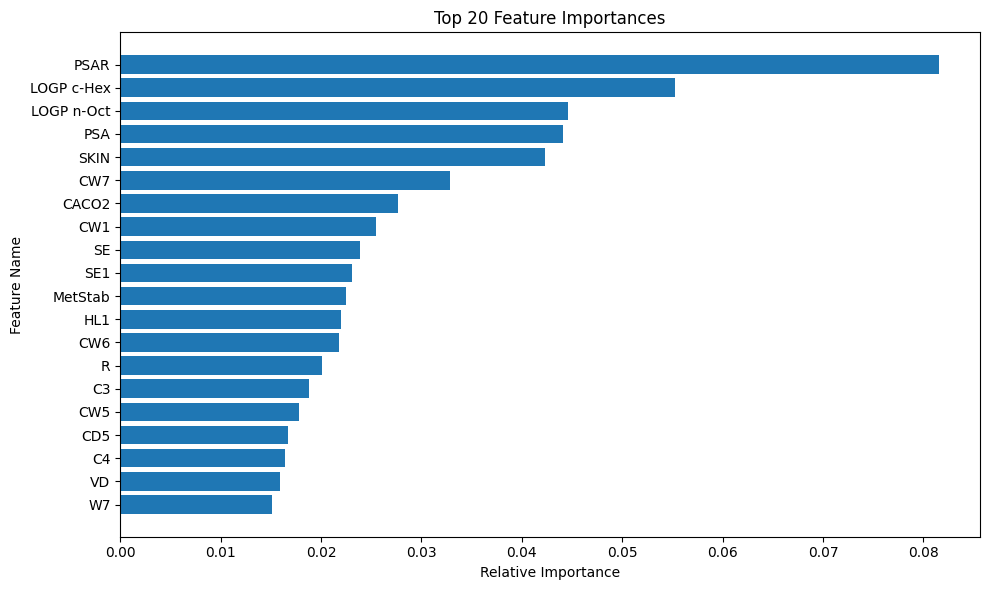

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Extract feature names from X_test
if hasattr(X_test, 'columns'):
    feature_names = X_test.columns.tolist()
else:
    raise ValueError("X_test is not a pandas DataFrame. Feature names cannot be extracted.")

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Print test accuracy
print(f"\nTest Accuracy: {test_accuracy:.3f}")

# Get feature importances from the best model
feature_importances = best_model.feature_importances_

# Sort the features by importance
indices = np.argsort(feature_importances)[::-1]

# Print the most important features with names
print("\nFeature Ranking:")
for i, idx in enumerate(indices):
    print(f"{i + 1}. Feature {idx:3d} ({feature_names[idx]:15}): Importance = {feature_importances[idx]:.6f}")
# Visualize the feature importances (top 20 features)
plt.figure(figsize=(10, 6))
top_features = 20
plt.title(f"Top {top_features} Feature Importances")
plt.barh(range(top_features), feature_importances[indices[:top_features]][::-1], align='center')
plt.yticks(range(top_features), [feature_names[indices[i]] for i in range(top_features)][::-1])
plt.xlabel("Relative Importance")
plt.ylabel("Feature Name")
plt.tight_layout()
plt.show()
